In [1]:
%%bash
pip install onnx -q
pip install onnxruntime -q

In [2]:
import os
import cv2
import onnx
import pickle
import random as r
import numpy as np
import pandas as pd
import onnxruntime as ort
import matplotlib.pyplot as plt

from typing import Union
from IPython.display import clear_output

import warnings
warnings.filterwarnings("ignore")

In [3]:
labels: dict = {
    0 : "cup",
    1 : "fork",
    2 : "glass",
    3 : "knife",
    4 : "plate",
    5 : "spoon"
}
    

def breaker() -> None:print("\n" + 50*"*" + "\n")

    
def get_image(
    path: str, 
) -> np.ndarray:
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    return cv2.cvtColor(src=image, code=cv2.COLOR_BGR2RGB)


def show_image(
    image: np.ndarray, 
    cmap: str="gnuplot2", 
    title: Union[str, None]=None
) -> None:
    plt.figure()
    plt.imshow(image, cmap=cmap)
    plt.axis("off")
    if title: plt.title(title)
    plt.show()

In [4]:
class FeatureExtractor(object):
    def __init__(self) -> None:
        self.ort_session = None
        self.size: int = 384
            
        # self.mean: list = [0.5, 0.5, 0.5]
        # self.std: list  = [0.5, 0.5, 0.5]
        
        self.mean: list = [0.52184, 0.47946, 0.43919]
        self.std: list  = [0.17009, 0.17413, 0.17846]
        
        self.path: str = "/kaggle/input/swin-features-onnx/swin_large_patch4_window12_384_in22k.onnx"

        ort.set_default_logger_severity(3)
    
    def setup(self) -> None:
        model = onnx.load(self.path)
        onnx.checker.check_model(model)
        self.ort_session = ort.InferenceSession(self.path)
    
    def infer(self, image: np.ndarray) -> np.ndarray:
        h, w, _ = image.shape

        image = image / 255
        image = cv2.resize(src=image, dsize=(self.size, self.size), interpolation=cv2.INTER_AREA).transpose(2, 0, 1)
        for i in range(image.shape[0]): image[i, :, :] = (image[i, :, :] - self.mean[i]) / self.std[i]
        image = np.expand_dims(image, axis=0)
        inputs = {self.ort_session.get_inputs()[0].name : image.astype("float32")}
        return self.ort_session.run(None, inputs)[0][:, -1, :]

feature_extractor = FeatureExtractor()
feature_extractor.setup()

classifier = pickle.load(open("/kaggle/input/kc-swin-features-train/models/swin_large_patch4_window12_384_in22k_lgr_1.pkl", "rb"))


**************************************************



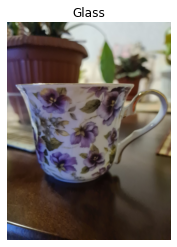


**************************************************



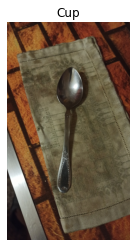


**************************************************



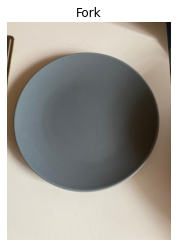


**************************************************



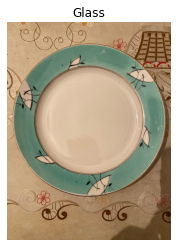


**************************************************



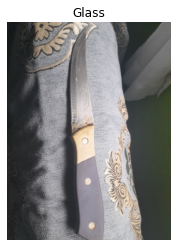


**************************************************



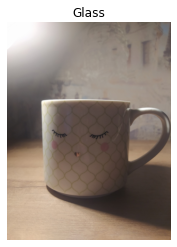


**************************************************



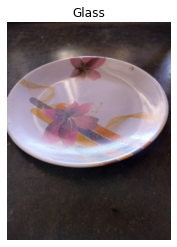


**************************************************



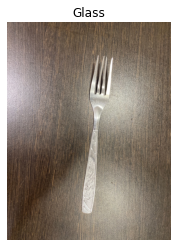


**************************************************



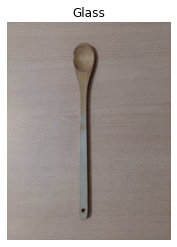


**************************************************



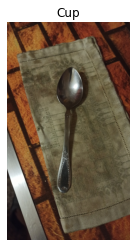


**************************************************



In [5]:
df = pd.read_csv("/kaggle/input/kc-dataframe/test.csv")

breaker()
for _ in range(10):
    index = r.randint(0, df.shape[0] - 1)
    
    filepath = df.iloc[index, 0]
    
    image = get_image(filepath)
    
    features = feature_extractor.infer(image)
    y_pred = labels[classifier.predict(features)[0]].title()
    show_image(image, title=y_pred)
    
    breaker()